# Logistic Regression

## Part 1 - Data Preprocessing

### Importing the dataset

In [45]:
import pandas as pd
dataset = pd.read_csv('Satisfaction.csv')
dataset['Accuracy'] = dataset['Accuracy'].map({'Yes': 1, 'No': 0})
dataset.fillna(0, inplace=True)

In [46]:
dataset.head(10)

,Customer,How satisfied were you with your overall delivery experience at Ali? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,How satisfied were you with the quality of the food at Alis? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,How satisfied were you with the speed of delivery at Alis? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,Accuracy
0,1,5.0,3.0,4.0,1.0
1,2,3.0,4.0,3.0,1.0
2,3,4.0,5.0,2.0,1.0
3,4,5.0,3.0,4.0,1.0
4,5,2.0,5.0,1.0,1.0
5,6,5.0,2.0,5.0,1.0
6,7,1.0,4.0,3.0,1.0
7,8,3.0,3.0,2.0,0.0
8,9,5.0,1.0,3.0,1.0
9,10,3.0,5.0,3.0,0.0


### Getting the inputs and output

In [47]:
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [48]:
X

array([[5., 3., 4.],
       [3., 4., 3.],
       [4., 5., 2.],
       ...,
       [5., 3., 3.],
       [3., 3., 3.],
       [1., 3., 3.]])

In [49]:
y


array([1., 1., 1., ..., 1., 1., 1.])

### Creating the Training Set and the Test Set


In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [51]:
X_train

array([[5., 5., 5.],
       [1., 5., 5.],
       [3., 3., 3.],
       ...,
       [3., 3., 3.],
       [3., 3., 3.],
       [5., 5., 5.]])

In [52]:
y_train

array([0., 1., 0., ..., 1., 1., 0.])

In [53]:
X_test

array([[2., 3., 3.],
       [2., 2., 4.],
       [5., 5., 5.],
       ...,
       [1., 5., 5.],
       [4., 5., 3.],
       [5., 1., 3.]])

In [54]:
y_test

array([0., 1., 1., ..., 0., 0., 0.])

### Feature Scaling

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [56]:
X_train

array([[ 1.17598677,  1.17758391,  1.18742677],
       [-1.42465897,  1.17758391,  1.18742677],
       [-0.1243361 , -0.16335375, -0.15957138],
       ...,
       [-0.1243361 , -0.16335375, -0.15957138],
       [-0.1243361 , -0.16335375, -0.15957138],
       [ 1.17598677,  1.17758391,  1.18742677]])

## Part 2 - Building and training the model

### Building the model

In [57]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 42)


### Training the model

In [58]:
model.fit(X_train, y_train)


LogisticRegression(random_state=42)

### Inference

Making the predictons of the data points in the test set

In [59]:
y_pred = model.predict(sc.transform(X_test))


In [60]:
print(y_pred)



[1. 1. 1. ... 1. 1. 1.]


In [61]:
print((model.predict(sc.transform([[5,3,4]]))))

[1.]


## Part 3: Evaluating the model 

### Confusion Matrix

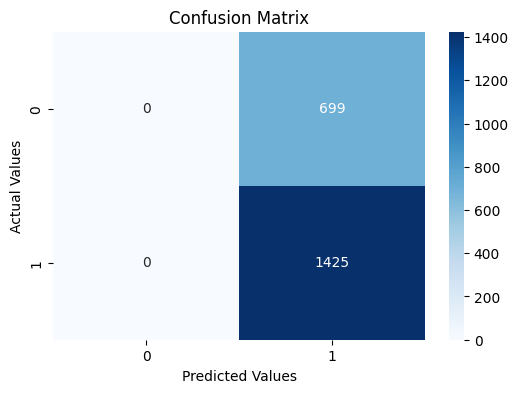

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

### Accuracy

In [63]:
(0+1426)/(0+1426+698+0)

0.6713747645951036

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6709039548022598